In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image


In [20]:
base_dir = '/content/drive/MyDrive/ktintern/'

inceptionV3_model = tf.keras.models.load_model(os.path.join(base_dir, 'checkpoints/inceptionV3_model_nodress.h5'))

In [21]:

clothes_info = {
    0: '0_coat', 1: '1_padding', 2: '2_shortsleeve',
    3: '3_longsleeve', 4: '4_shirt', 5: '5_pants'
}

In [22]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background
    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

def get_test_image(path):
  image = load_img(path, color_mode='rgba', target_size=(299, 299))
  display(image)
  image = img_to_array(image)
  image = rgba2rgb(image)
  # image = image[80:-80, 80:-80]

  plt.imshow(image, interpolation='nearest')
  plt.show()

  image = np.expand_dims(image, axis=0)
  image = image.astype('float32')
  image = image / 255.0
  return image

def get_prediction(test_image):
  prediction = inceptionV3_model.predict(test_image)
  pred = prediction[0]
  
  plt.barh(list(clothes_info.values()), pred)
  plt.show()

  print(clothes_info[np.argmax(prediction)])

In [23]:
test_dir = os.path.join(base_dir, 'datasets', 'deep_test', 'test2')

/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (7).PNG


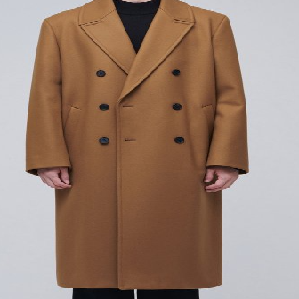

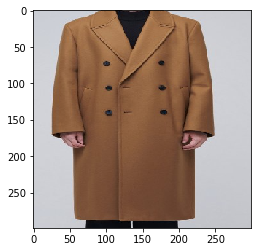

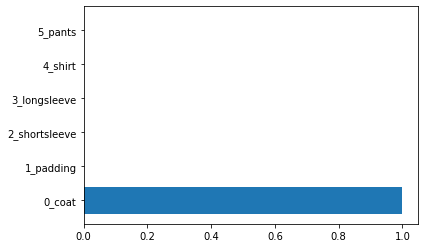

0_coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (2).PNG


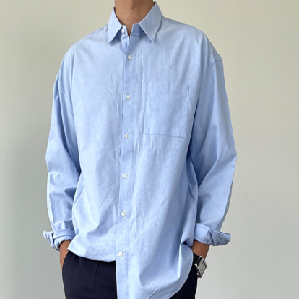

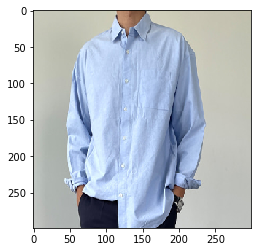

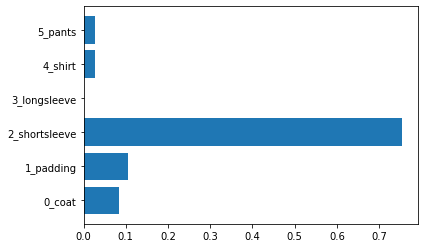

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (11).jpg


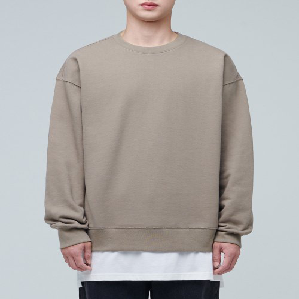

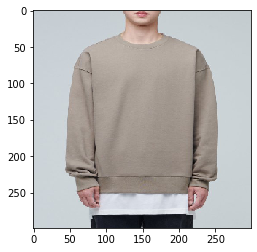

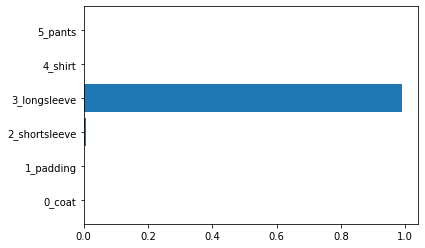

3_longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (5).jpg


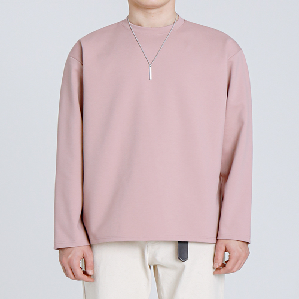

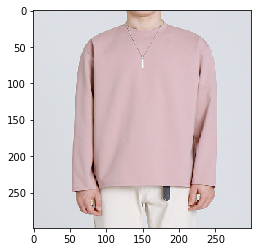

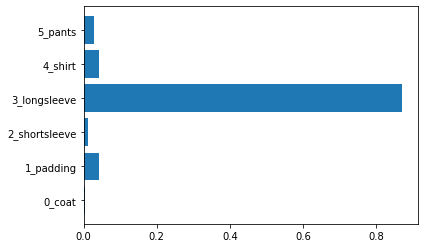

3_longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (14).JPG


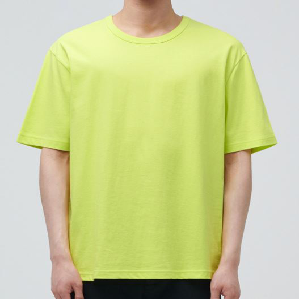

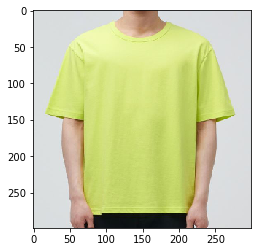

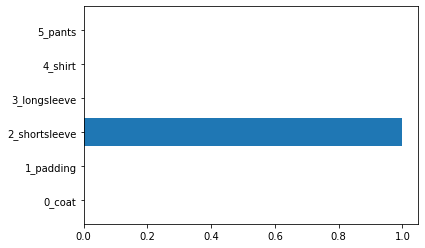

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (9).PNG


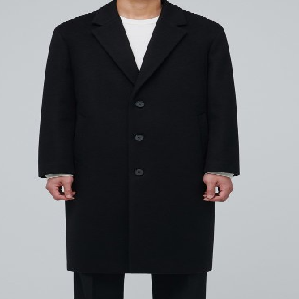

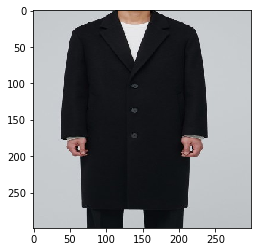

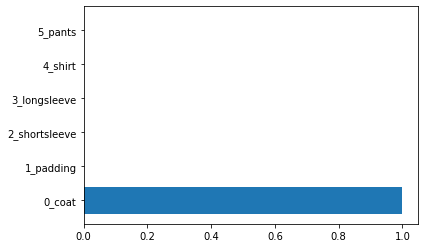

0_coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (2).jpg


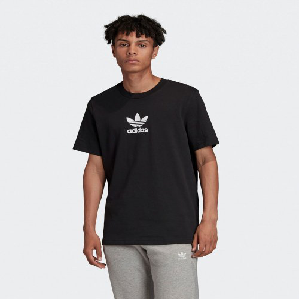

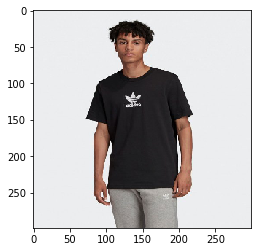

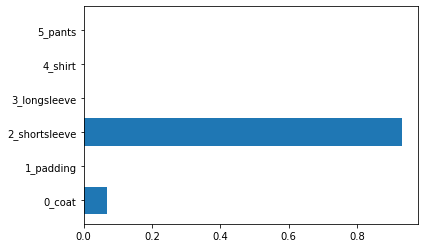

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (8).PNG


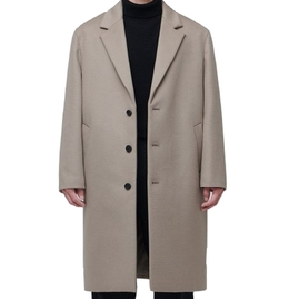

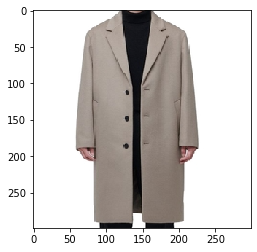

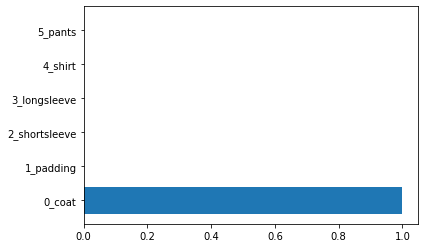

0_coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (16).JPG


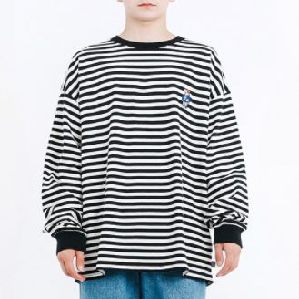

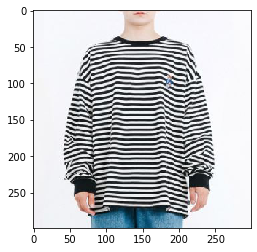

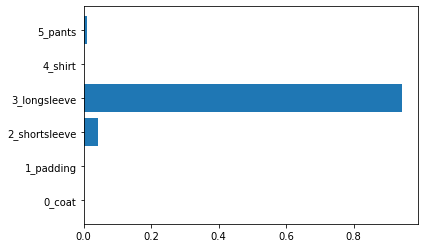

3_longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (6).jpg


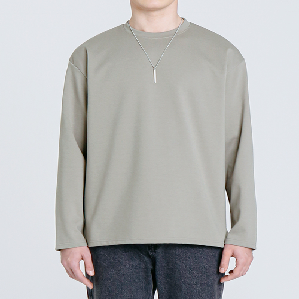

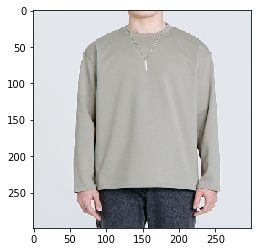

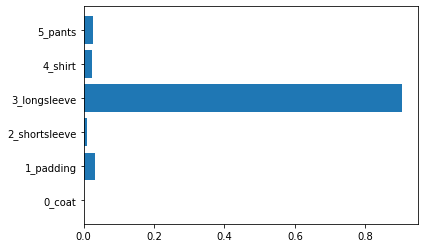

3_longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (15).JPG


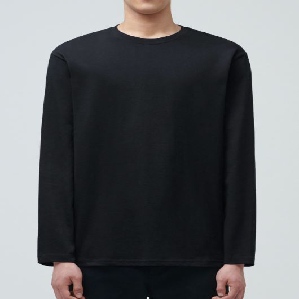

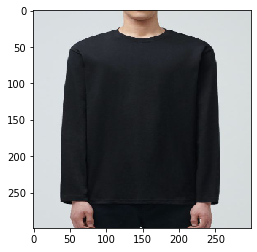

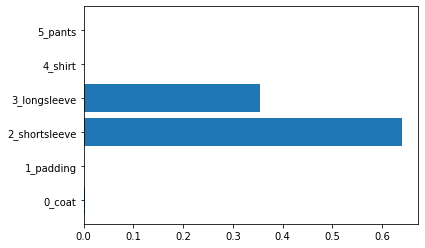

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (1).PNG


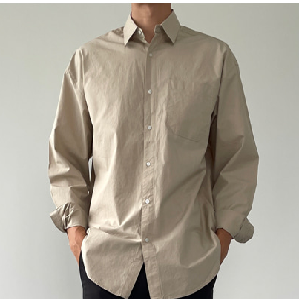

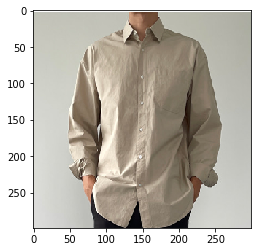

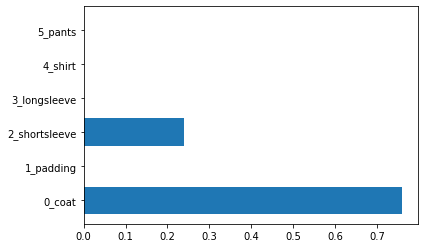

0_coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (9).jpg


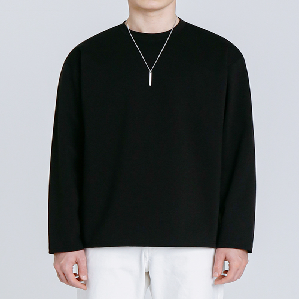

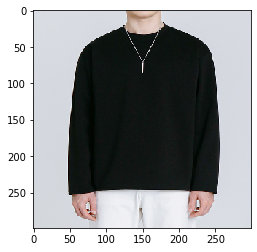

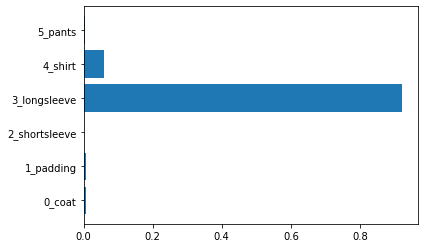

3_longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (12).JPG


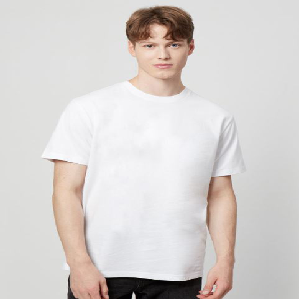

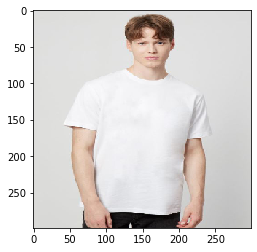

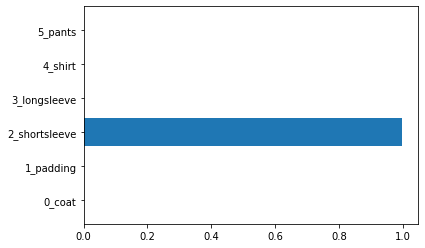

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (1).jpg


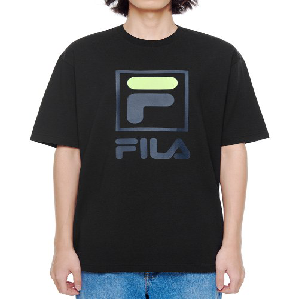

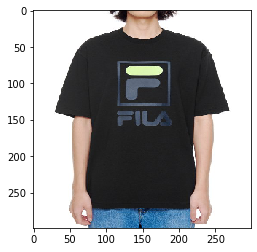

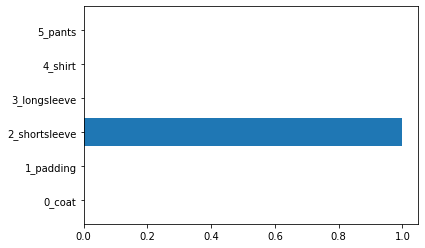

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (10).PNG


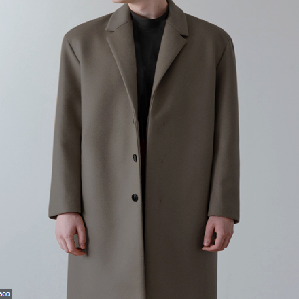

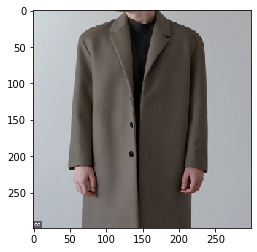

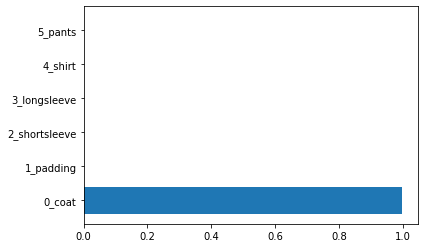

0_coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (10).jpg


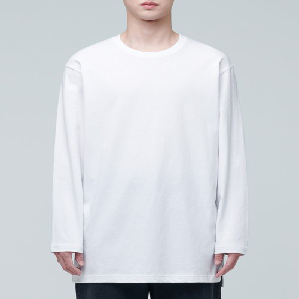

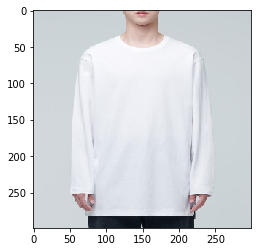

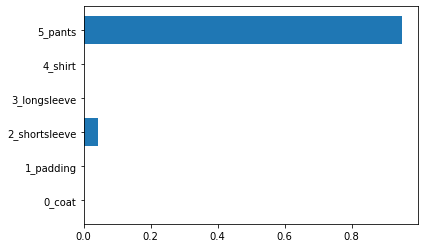

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (3).jpg


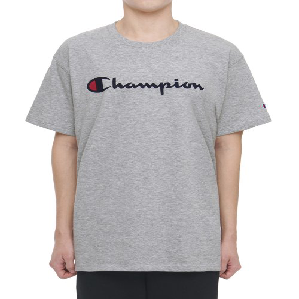

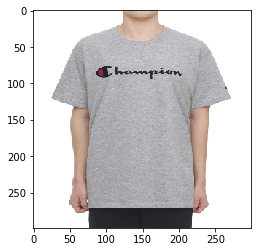

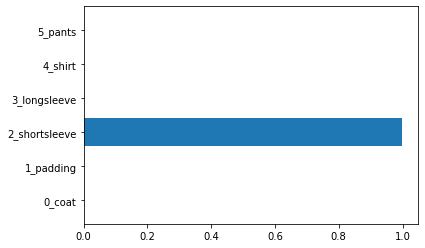

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (4).jpg


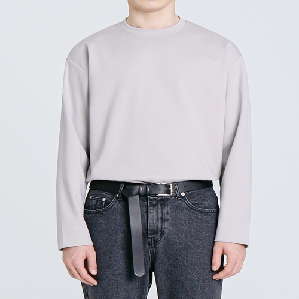

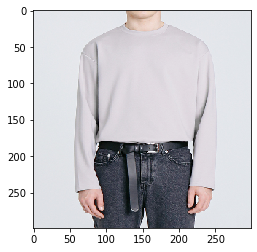

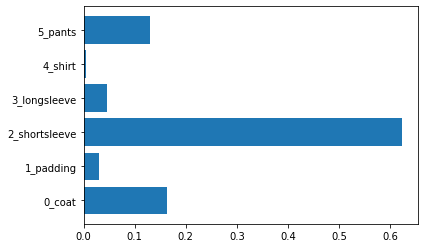

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (8).jpg


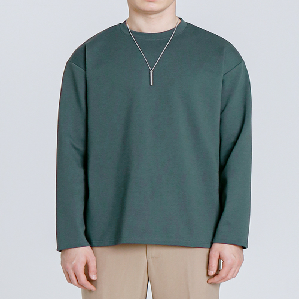

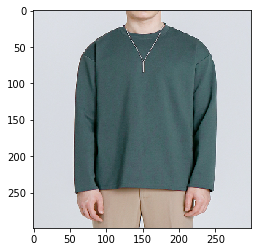

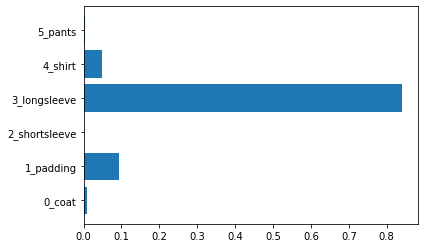

3_longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (5).PNG


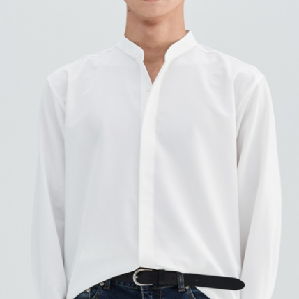

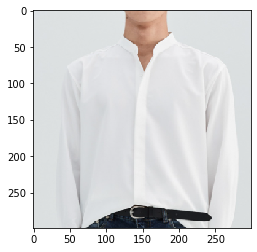

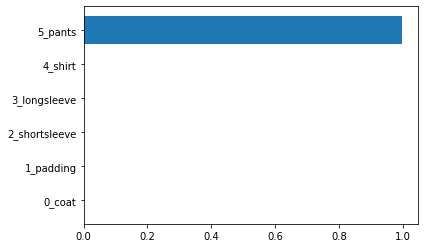

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (3).PNG


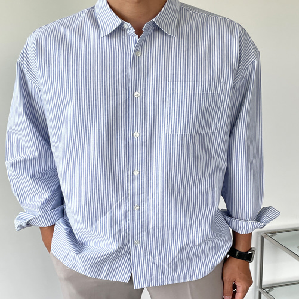

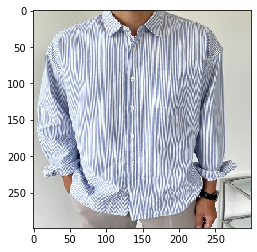

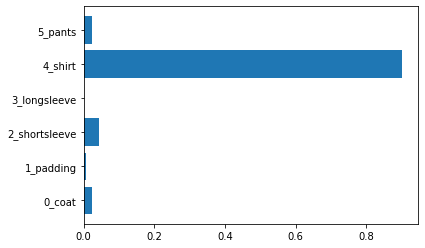

4_shirt
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (7).jpg


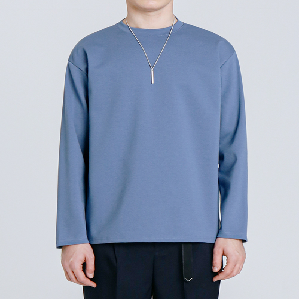

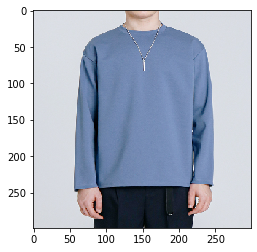

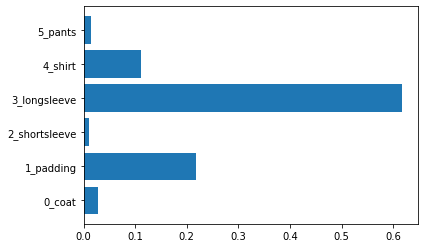

3_longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (17).JPG


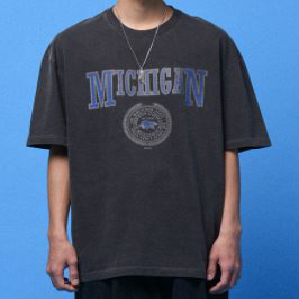

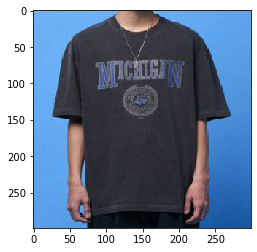

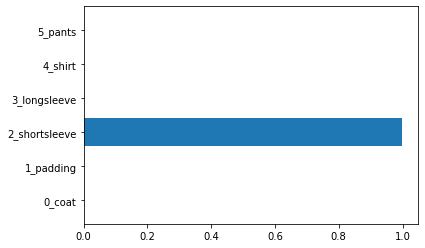

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (6).PNG


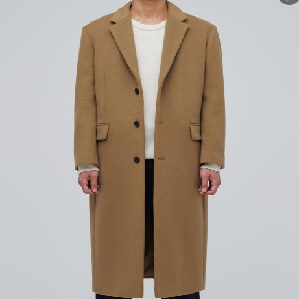

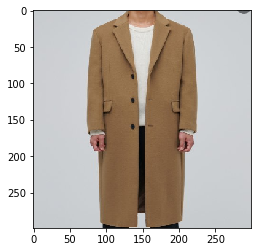

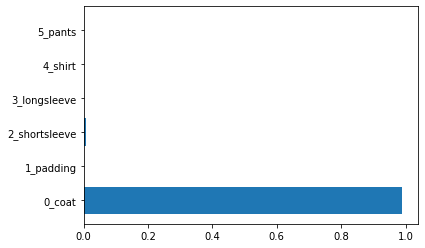

0_coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (4).PNG


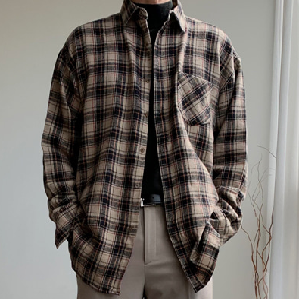

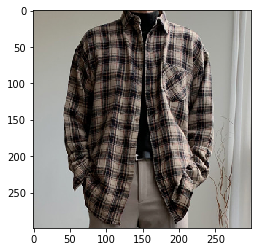

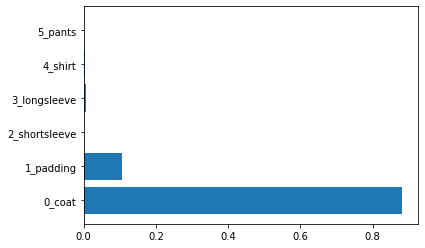

0_coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (18).JPG


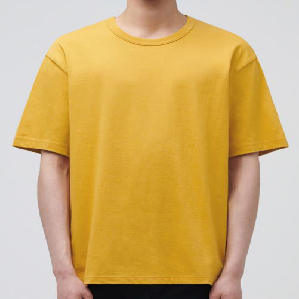

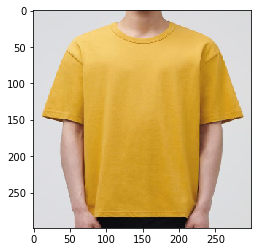

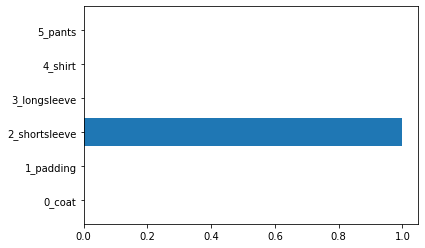

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/test (13).JPG


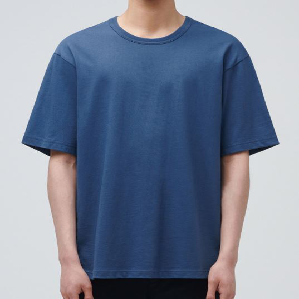

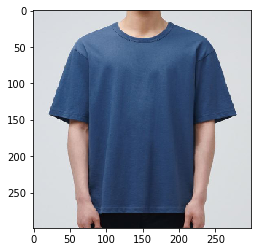

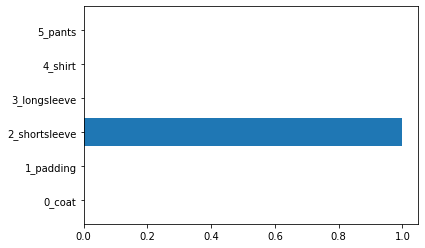

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/patest (5).PNG


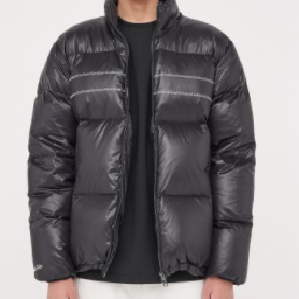

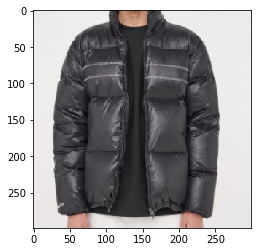

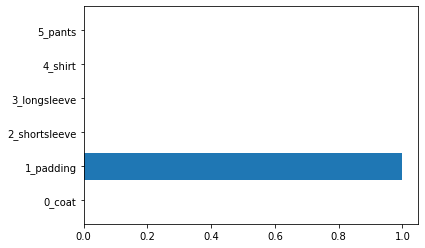

1_padding
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/patest (3).PNG


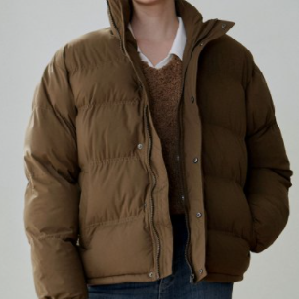

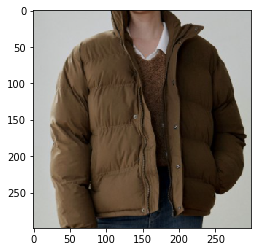

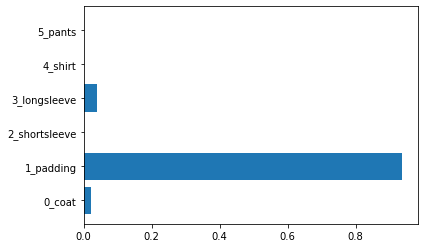

1_padding
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/patest (4).PNG


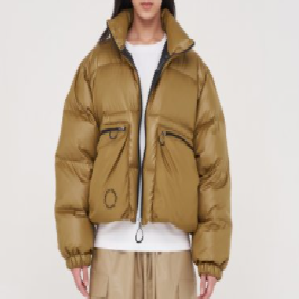

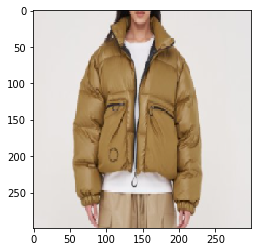

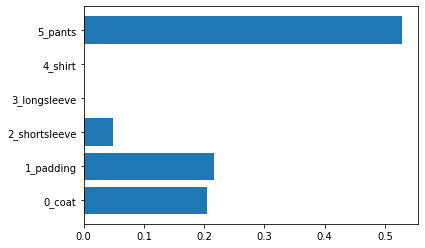

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/patest (2).PNG


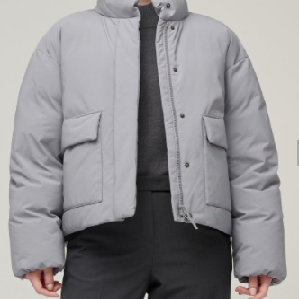

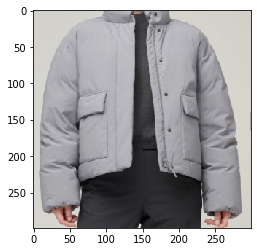

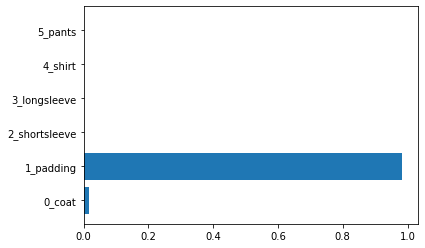

1_padding
/content/drive/MyDrive/ktintern/datasets/deep_test/test2/patest (1).PNG


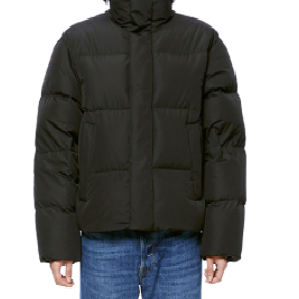

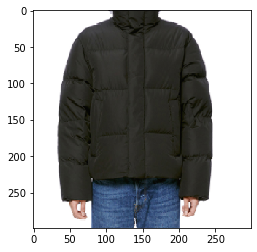

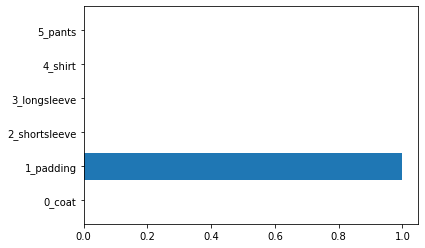

1_padding


In [24]:
for (root, directories, files) in os.walk(test_dir):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

In [25]:
test_dir2 = os.path.join(base_dir, 'datasets', 'deep_test', 'test1')

/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out.png


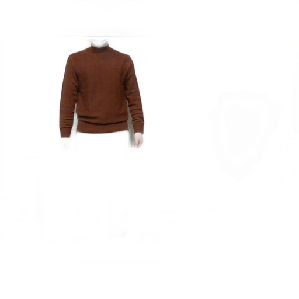

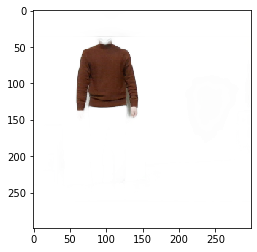

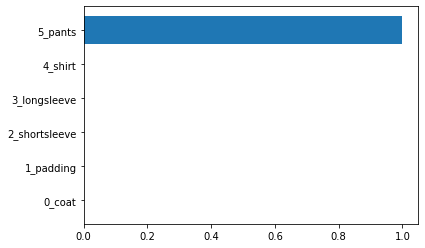

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out_cropped.png


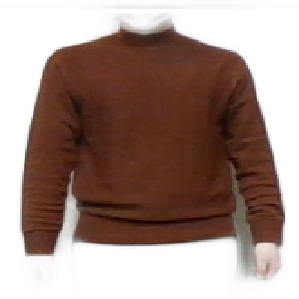

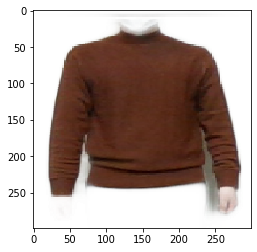

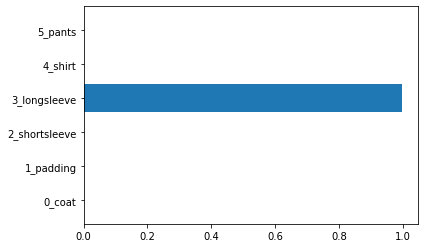

3_longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out.jpg


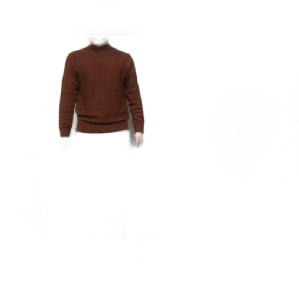

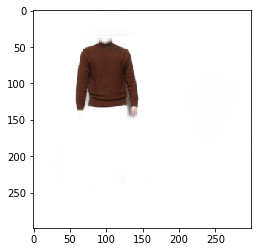

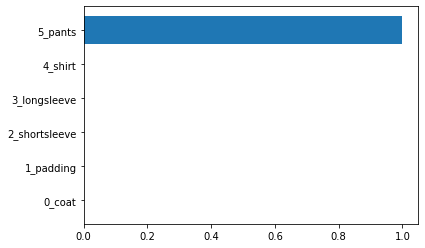

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_1.png


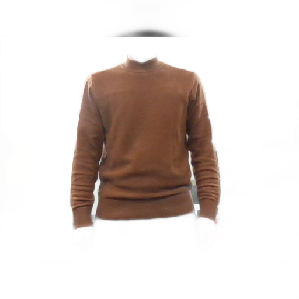

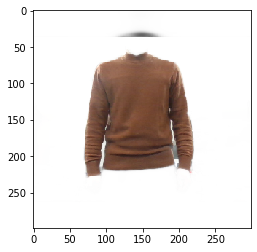

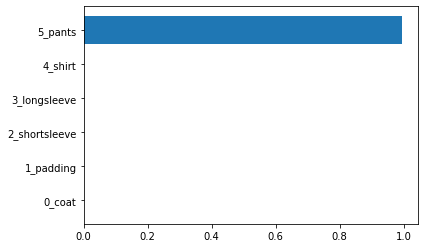

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_2.png


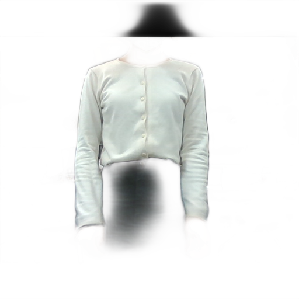

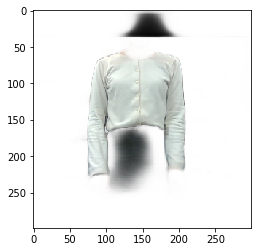

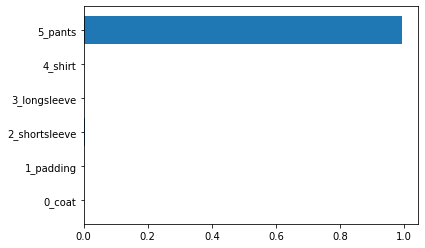

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_3.png


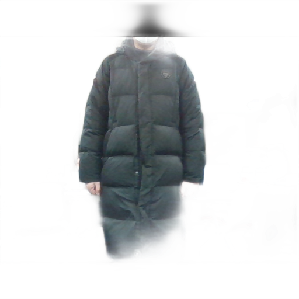

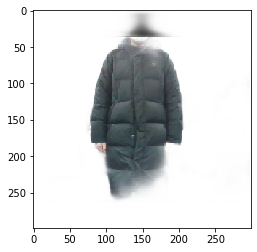

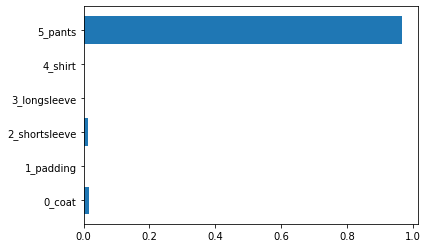

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_4.png


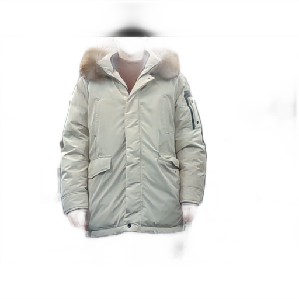

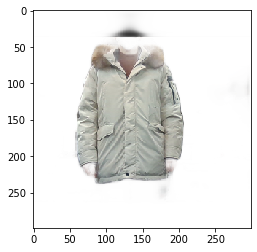

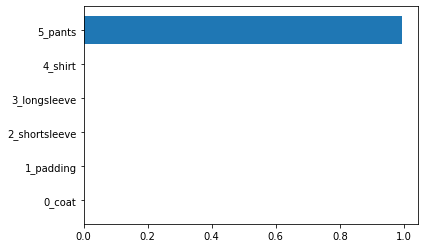

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_3_2.PNG


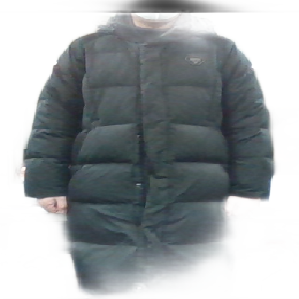

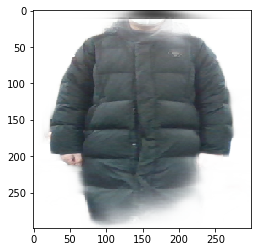

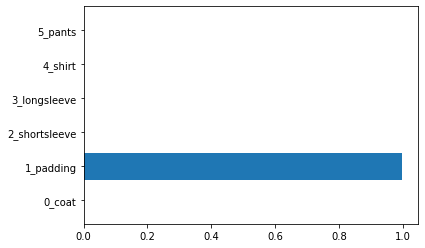

1_padding
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_2_2.PNG


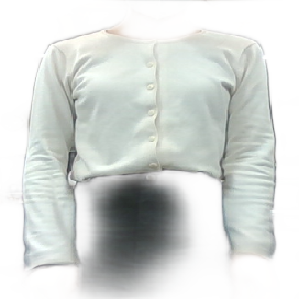

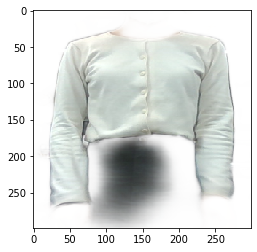

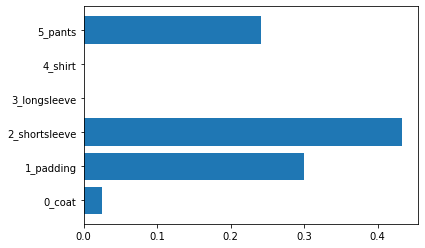

2_shortsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_1_2.PNG


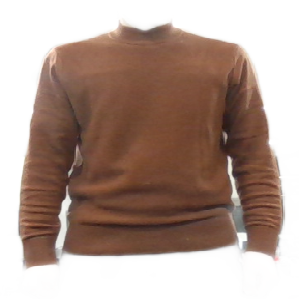

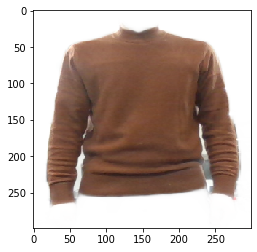

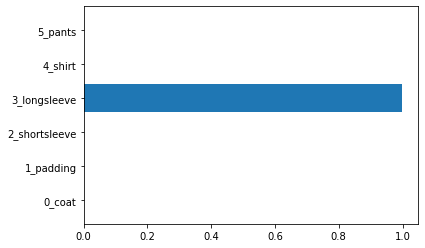

3_longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_4_2.PNG


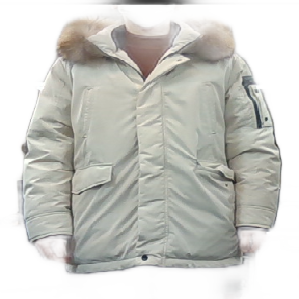

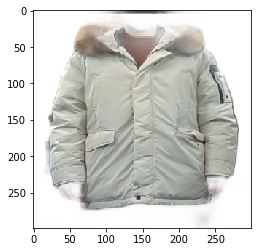

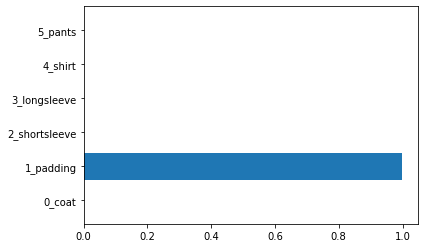

1_padding
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out3_1.png


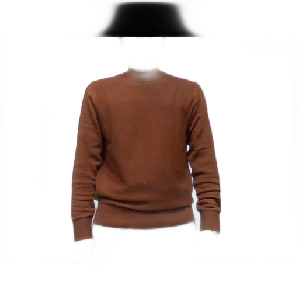

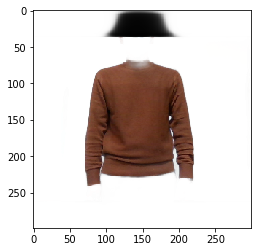

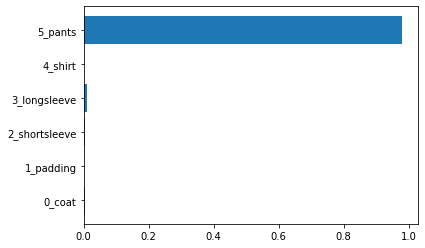

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out3_4.png


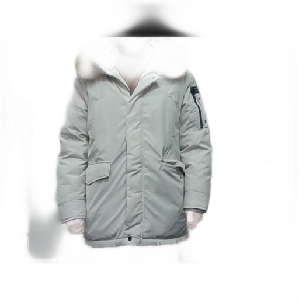

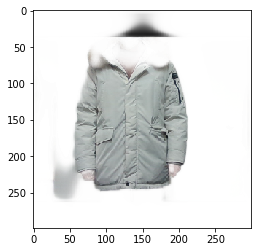

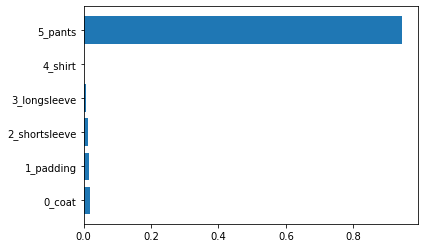

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out3_2.png


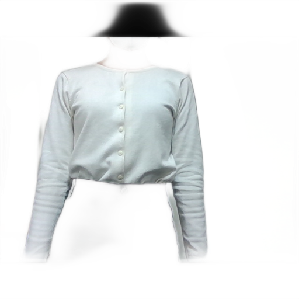

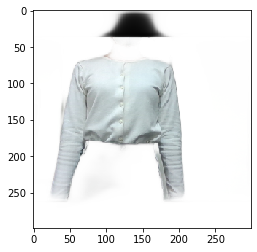

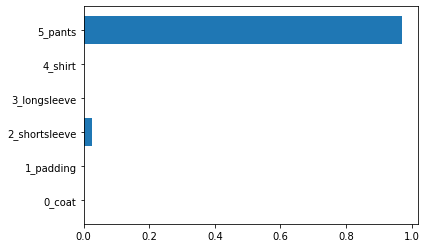

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out3_3.png


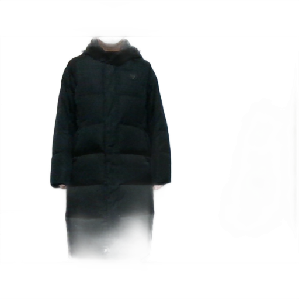

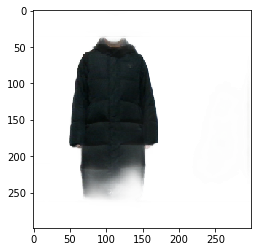

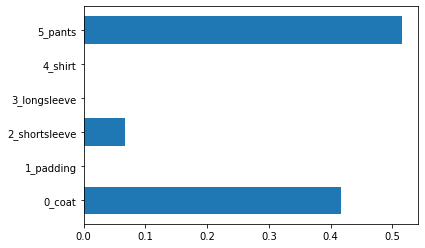

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out4_1.png


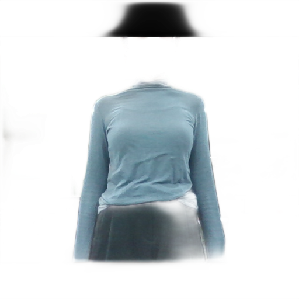

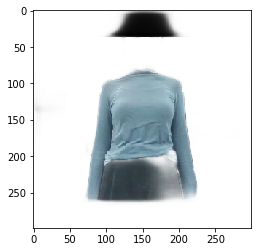

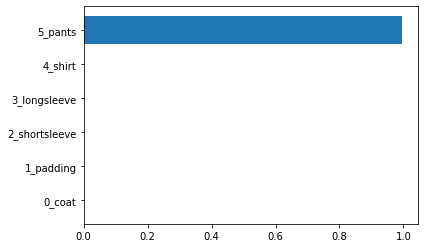

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out4_2.png


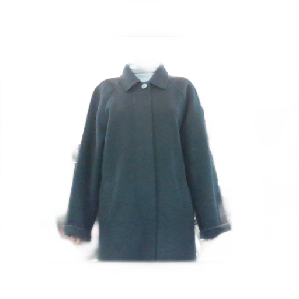

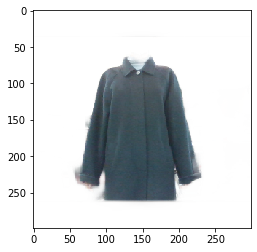

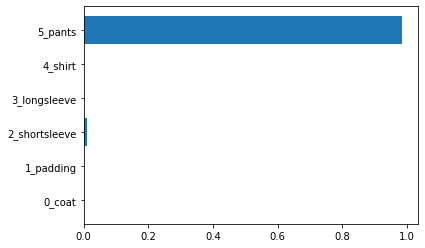

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out4_3.png


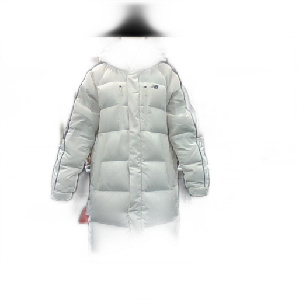

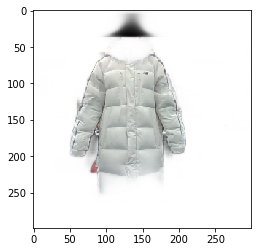

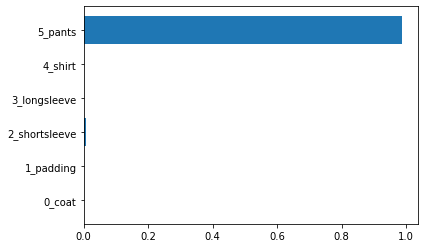

5_pants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out4_4.png


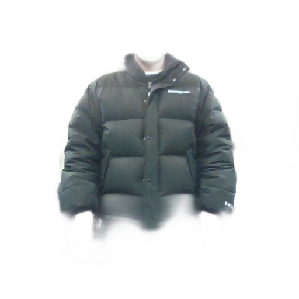

In [ ]:
for (root, directories, files) in os.walk(test_dir2):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

In [ ]:
test_dir3 = os.path.join(base_dir, 'datasets', 'deep_test', 'test3')

In [ ]:
for (root, directories, files) in os.walk(test_dir3):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

In [ ]:
test_dir4 = os.path.join(base_dir, 'datasets', 'deep_test', 'test4')
for (root, directories, files) in os.walk(test_dir4):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

In [ ]:
base_dir = '/content/drive/MyDrive/ktintern/'

inceptionV3_model = tf.keras.models.load_model(os.path.join(base_dir, 'checkpoints/inceptionV3_ft_model_nodress.h5'))

In [ ]:
test_dir = os.path.join(base_dir, 'datasets', 'deep_test', 'test2')

In [ ]:
for (root, directories, files) in os.walk(test_dir):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

In [ ]:
test_dir2 = os.path.join(base_dir, 'datasets', 'deep_test', 'test1')

In [ ]:
for (root, directories, files) in os.walk(test_dir2):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

In [ ]:
test_dir3 = os.path.join(base_dir, 'datasets', 'deep_test', 'test3')

In [ ]:
for (root, directories, files) in os.walk(test_dir3):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

In [ ]:
test_dir4 = os.path.join(base_dir, 'datasets', 'deep_test', 'test4')
for (root, directories, files) in os.walk(test_dir4):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)